## HPC Lab-8
Name: Tanvi Penumudy

Enroll No: E18CSE187

In [1]:
import multiprocessing
import time
import numpy as np
import random
import math 
import matplotlib.pyplot as plt

In [2]:
def N(n):
  c=0
  for i in range(n):
    c+=1
  return c

In [3]:
def N2(n):
  c=0
  for i in range(n):
    for j in range(n):
      c+=1
  return c

In [4]:
def N3(n):
  c=0
  for i in range(n):
    for j in range(n):
      for k in range(n):
        c+=1
  return c

In [5]:
def logN(n):
  i,c=1,0
  while(i<n):
    c+=1
    i*=2
  return c

In [6]:
def NlogN(n):
  j,c=1,0
  for i in range(n):
    while(j<n):
      c+=1
      j*=2
  return c

In [7]:
n, times = 500, []

In [8]:
# N
%%time
t = time.time()
N(n)
times.append(time.time() - t)

CPU times: user 27 µs, sys: 5 µs, total: 32 µs
Wall time: 35 µs


In [9]:
# N^2
%%time
t = time.time()
N2(n)
times.append(time.time() - t)

CPU times: user 15 ms, sys: 0 ns, total: 15 ms
Wall time: 18.3 ms


In [10]:
# N^3
%%time
t = time.time()
N3(n)
times.append(time.time() - t)

CPU times: user 5.55 s, sys: 0 ns, total: 5.55 s
Wall time: 5.56 s


In [11]:
# LogN
%%time
t = time.time()
logN(n)
times.append(time.time() - t)

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 12.4 µs


In [12]:
# NLogN
%%time
t = time.time()
NlogN(n)
times.append(time.time() - t)

CPU times: user 29 µs, sys: 1e+03 ns, total: 30 µs
Wall time: 32.7 µs


In [13]:
print(*times)
tt = []
tt.append(sum(times))
print(sum(times))

2.8133392333984375e-05 0.018224716186523438 5.5622663497924805 3.814697265625e-06 2.6226043701171875e-05
5.580549240112305


In [14]:
# Parallel (5 Jobs - 5 Cores)
%%time
t = time.time()

def worker1(n): 
  N(n)

def worker2(n):
  N2(n)

def worker3(n):
  N3(n)

def worker4(n):
  logN(n)

def worker5(n):
  NlogN(n)
  
if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)
  p3 = multiprocessing.Process(target=worker3) 
  p4 = multiprocessing.Process(target=worker4)
  p5 = multiprocessing.Process(target=worker5)

  # starting processes 
  p1.start() 
  p2.start()
  p3.start() 
  p4.start()
  p5.start()

  # wait until processes are finished 
  p1.join() 
  p2.join()
  p3.join() 
  p4.join()  
  p5.join()

  n=500
  worker1(n)
  worker2(n)
  worker3(n)
  worker4(n)
  worker5(n)
  print("Done!")

tt.append(time.time()-t)

Process Process-1:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process Process-2:
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Process Process-5:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process Process-3:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process Process-4:
TypeError: worker1() missing 1 required positional argument: 'n'
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
TypeError: worker5() missing 1 required positional argument: 'n'
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    sel

Done!
CPU times: user 5.63 s, sys: 40.9 ms, total: 5.67 s
Wall time: 5.73 s


A. Random Allocation

In [15]:
def RandomAllocation(jobs):
  choice = random.randint(0,jobs-1)
  if(choice not in alloc):
    alloc.append(choice)
  else:
    RandomAllocation(jobs)
  return choice

In [16]:
def execute(func, n):
  if(func==0):
    exe[func]=1
    return N(n)
  elif(func==1):
    exe[func]=1
    return N2(n)
  elif(func==2):
    exe[func]=1
    return N3(n)
  elif(func==3):
    exe[func]=1
    return logN(n)
  elif(func==4):
    exe[func]=1
    return NlogN(n)
  else:
    return None

In [17]:
def TwoCoreAllocation(jobs):
  a,b=1,0
  a+=random.randint(0,jobs-2)
  b=jobs-a
  return a, b

In [18]:
alloc = []
exe = [0 for i in range(5)]
jobs = 5

In [19]:
# Random Scheduler (2 Cores)
%%time
t = time.time()

def worker1(a, jobs, n): 
  for _ in range(a):
    RandomAllocation(jobs)
  j=0
  for _ in range(a):
    execute(alloc[j],n)
    j+=1

def worker2(a, b, jobs, n):
  for _ in range(b):
    RandomAllocation(jobs)
  j=a
  for _ in range(b):
    execute(alloc[j],n)
    j+=1

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join()

  n=500
  a,b = TwoCoreAllocation(5)
  worker1(a, 5, n)
  worker2(a, b, 5, n)
  print("Done!")
  print(alloc)
  print(exe)

tt.append(time.time()-t)

Process Process-6:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Process Process-7:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
TypeError: worker1() missing 3 required positional arguments: 'a', 'jobs', and 'n'
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 4 required positional arguments: 'a', 'b', 'jobs', and 'n'


Done!
[0, 4, 2, 3, 1]
[1, 1, 1, 1, 1]
CPU times: user 5.6 s, sys: 12.9 ms, total: 5.61 s
Wall time: 5.64 s


B. Shortest Job First Allocation

In [20]:
print(*times)

2.8133392333984375e-05 0.018224716186523438 5.5622663497924805 3.814697265625e-06 2.6226043701171875e-05


In [21]:
sorted = (np.argsort(times, axis=0)).tolist()
sorted

[3, 4, 0, 1, 2]

In [22]:
exe = [0 for i in range(5)]
jobs = 5

In [23]:
# Shortest Job First Scheduler (2 Cores)
%%time
t = time.time()

def worker1(a, n): 
  j=0
  for _ in range(a):
    execute(sorted[j],n)
    j+=1

def worker2(a, b, n):
  j=a
  for _ in range(b):
    execute(sorted[j],n)
    j+=1

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join()

  n=500
  a,b = TwoCoreAllocation(5)
  worker1(a, n)
  worker2(a, b, n)
  print("Done!")
  print(sorted)
  print(exe)

tt.append(time.time()-t)

Process Process-8:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process Process-9:
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker1() missing 2 required positional arguments: 'a' and 'n'
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 3 required positional arguments: 'a', 'b', and 'n'


Done!
[3, 4, 0, 1, 2]
[1, 1, 1, 1, 1]
CPU times: user 5.62 s, sys: 16 ms, total: 5.64 s
Wall time: 5.67 s


C. Knapsack Based Allocation

In [24]:
def calculateScore(v,w,n):
    score = np.array([])
    for i in range(n):
        score = np.append(score, round((v[i]/w[i]),3)) 
    scoreIdx = np.argsort(-score)
    return scoreIdx

def knapsack(v,w,n,W):
    s = 0
    scoreIdx = calculateScore(v,w,n)
    idx = np.zeros(n).astype(int)
    for i in range(n):
       LargeIdx = scoreIdx[i]
       if((s+w[LargeIdx]) <= W):
           idx[LargeIdx] = 1 
           s += w[LargeIdx]
    return idx

In [25]:
jobs = 5
n = 500
n1 = 100
v1,v2,v3,v4,v5 = N(n1),N2(n1),N3(n1),logN(n1),NlogN(n1)
# vf = (v1+v2+v3+v4+v5)/5
v = np.array([v1,v2,v3,v4,v5])
w = np.array([n, pow(n,2), pow(n,3), round(math.log(n,10)), round((math.log(n,10))*n)])
exe = [0 for i in range(5)]
alloc = []
knap1, knap2 = [], []

In [26]:
# Knapsack Scheduler (2 Cores)
%%time
t = time.time()

def worker1(a, jobs, n): 
  for _ in range(a):
    RandomAllocation(jobs)
  j=0
  knap1,v1,w1 = [],[],[]
  for _ in range(a):
    knap1.append(alloc[j])
    v1.append(v[knap1[j]])
    w1.append(w[knap1[j]])
    j+=1
  v1,w1 = np.array(v1),np.array(w1) 
  res = knapsack(v1,w1,a,np.sum(w1))
  res1 = w1[res==1].tolist()
  for i in res1:
    execute((w.tolist()).index(i),n)

def worker2(a, b, jobs, n):
  for _ in range(b):
    RandomAllocation(jobs)
  j=a
  knap1,v1,w1 = [],[],[]
  for _ in range(b):
    knap1.append(alloc[j])
    j+=1
  for i in range(b):
    v1.append(v[knap1[i]])
    w1.append(w[knap1[i]])
  v1,w1 = np.array(v1),np.array(w1) 
  res = knapsack(v1,w1,b,np.sum(w1))
  res1 = w1[res==1].tolist()
  for i in res1:
    execute((w.tolist()).index(i),n)

if __name__ == "__main__": 

  # creating processes 
  p1 = multiprocessing.Process(target=worker1) 
  p2 = multiprocessing.Process(target=worker2)

  # starting processes 
  p1.start() 
  p2.start()

  # wait until processes are finished 
  p1.join() 
  p2.join()

  n=500
  a,b = TwoCoreAllocation(5)
  worker1(a, 5, n)
  worker2(a, b, 5, n)
  print("Done!")
  print(alloc)
  print(exe)

tt.append(time.time()-t)

Process Process-10:
Traceback (most recent call last):
Process Process-11:
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
TypeError: worker2() missing 4 required positional arguments: 'a', 'b', 'jobs', and 'n'
TypeError: worker1() missing 3 required positional arguments: 'a', 'jobs', and 'n'


Done!
[3, 1, 0, 4, 2]
[1, 1, 1, 1, 1]
CPU times: user 5.57 s, sys: 14 ms, total: 5.58 s
Wall time: 5.61 s


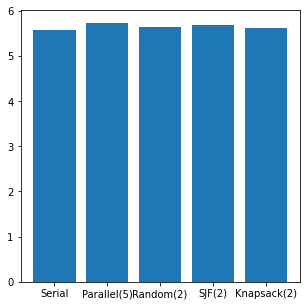

In [30]:
figure = plt.figure(figsize=(5,5))
plt.bar(["Serial","Parallel(5)","Random(2)","SJF(2)","Knapsack(2)"], tt)
plt.show()